## Problems

#### COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

https://www.kaggle.com/kimjihoo/coronavirusdataset/

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare, chi2_contingency, chi2

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

import missingno
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# **EDA**

### **CASES**

How people get infected?

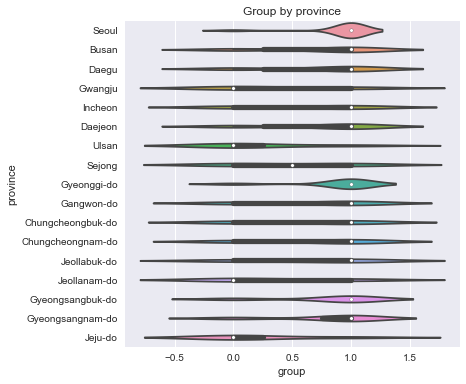

In [6]:
case =pd.read_csv("Case.csv", encoding = 'latin-1')
case.isnull().sum()
le = LabelEncoder()
case.group = le.fit_transform(case.group)
plt.figure(figsize = (6,6)) 
plt.title("Group by province")
sns.violinplot('group', 'province',data = case);

If the value is 'TRUE', the value of 'infection_cases' means the name of group. The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection. In the provinces the majority of infection happened among groups.

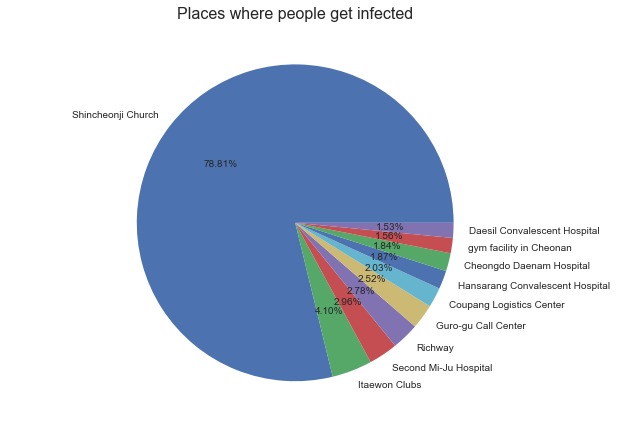

In [7]:
cases = case.loc[(case.group.isin([True]))]
cases_count = cases.groupby('infection_case', as_index = False).sum().sort_values(by = "confirmed", ascending = False)
df = cases_count[0:10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
infections = df.infection_case
count = df.confirmed
ax.pie(count, labels = infections,autopct='%1.2f%%')
plt.title("Places where people get infected", fontsize=16)
plt.show()

Mostly people get infected in church, hospitals, clubs or some kind of centers.

### **PATIENTS**

In [8]:
patient = pd.read_csv("PatientInfo.csv", encoding = 'latin-1')
patient.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

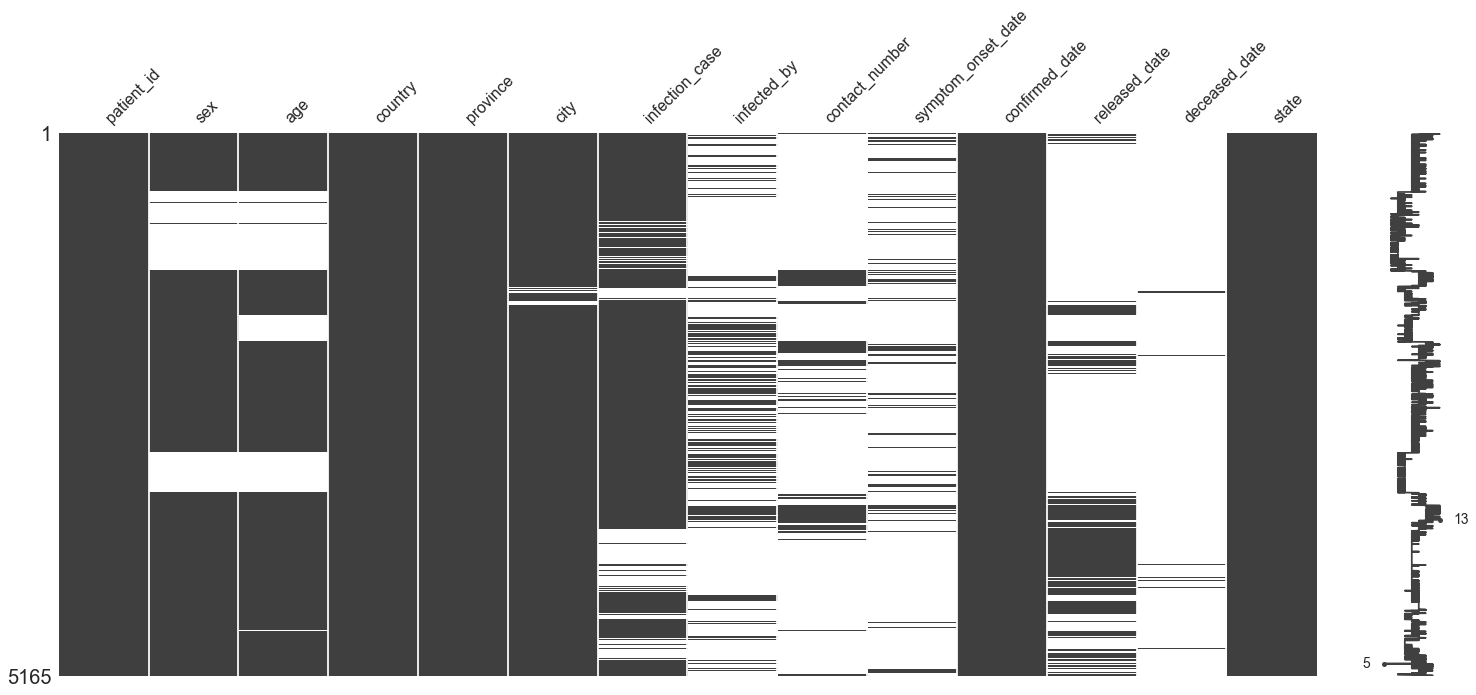

In [9]:
if patient.isnull().any(axis=None):
    missingno.matrix(patient)
    plt.show()

In [10]:
patient.deceased_date.replace({np.nan: "Not dead/Unknown"}, inplace=True)
patient.replace({np.nan: "Unknown"}, inplace=True)

Do patient state depends on gender?

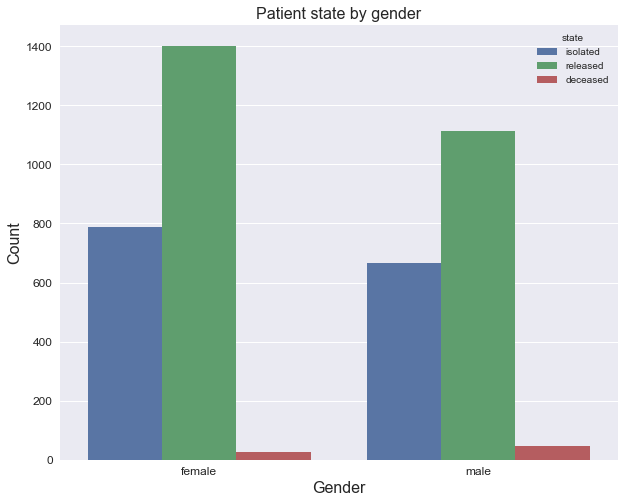

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(x = "sex",
            hue="state",
              order=["female", "male"],
            hue_order=["isolated", "released", "deceased"],
            data=patient)
plt.title("Patient state by gender", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

It is hard to state that patient state depends on gender.

How long does the average duration of treatment take?

In [12]:
patient.confirmed_date = pd.to_datetime(patient.confirmed_date, errors = 'coerce')
patient.released_date = pd.to_datetime(patient.released_date, errors = 'coerce')
patient['num_of_days_in_hospital'] = (patient['released_date'] - patient['confirmed_date'])
patient.drop(['patient_id', 'infected_by','symptom_onset_date','confirmed_date','released_date','deceased_date'], axis = 1, inplace = True)
patient.head()

sex  age country province         city        infection_case  \
0    male  50s   Korea    Seoul   Gangseo-gu       overseas inflow   
1    male  30s   Korea    Seoul  Jungnang-gu       overseas inflow   
2    male  50s   Korea    Seoul    Jongno-gu  contact with patient   
3    male  20s   Korea    Seoul      Mapo-gu       overseas inflow   
4  female  20s   Korea    Seoul  Seongbuk-gu  contact with patient   

  contact_number     state num_of_days_in_hospital  
0             75  released                 13 days  
1             31  released                 32 days  
2             17  released                 20 days  
3              9  released                 16 days  
4              2  released                 24 days

24.73156899810964

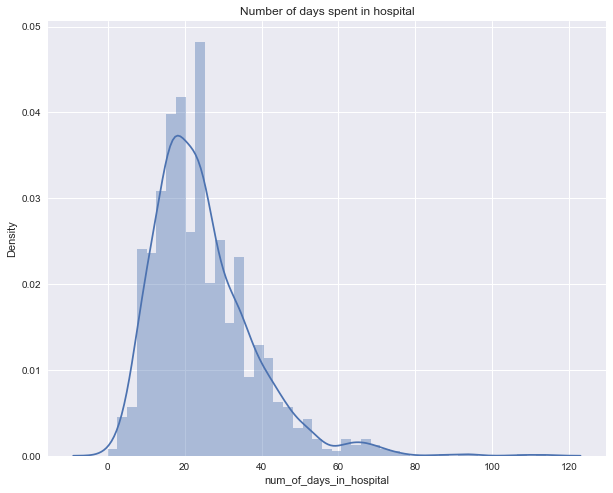

In [13]:
patient['num_of_days_in_hospital'] = patient['num_of_days_in_hospital']/np.timedelta64(1, 'D')
plt.figure(figsize = (10,8))
plt.title("Number of days spent in hospital")
sns.distplot(patient['num_of_days_in_hospital'])
patient.num_of_days_in_hospital.mean()

On avarage people in hospital spend 24 days.

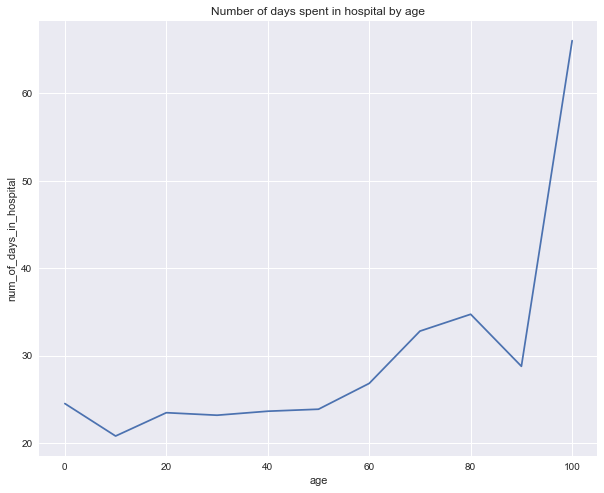

In [14]:
patient = patient[patient.age != "Unknown"]
patient['age'] =  patient['age'].str.rstrip('s')
patient['age'] =  pd.to_numeric( patient['age'])
plt.figure(figsize = (10,8))
plt.title("Number of days spent in hospital by age")

sns.lineplot('age','num_of_days_in_hospital',  data = patient);


Time spent in hospital increases with age.

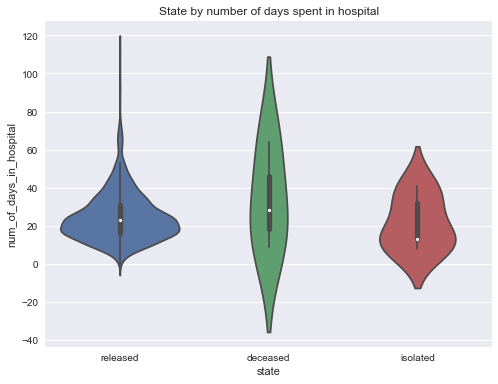

In [15]:
plt.figure(figsize = (8,6))
plt.title("State by number of days spent in hospital")
sns.violinplot('state','num_of_days_in_hospital',data = patient);

Those who were isolated were released from the hospital sooner. Those who died stayed in the hospital the longest.

### **POLICY**

In [16]:
policy = pd.read_csv("Policy.csv", encoding = 'latin-1')
policy.head()

policy_id country         type                      gov_policy  \
0          1   Korea        Alert  Infectious Disease Alert Level   
1          2   Korea        Alert  Infectious Disease Alert Level   
2          3   Korea        Alert  Infectious Disease Alert Level   
3          4   Korea        Alert  Infectious Disease Alert Level   
4          5   Korea  Immigration   Special Immigration Procedure   

             detail  start_date    end_date  
0    Level 1 (Blue)  2020-01-03  2020-01-19  
1  Level 2 (Yellow)  2020-01-20  2020-01-27  
2  Level 3 (Orange)  2020-01-28  2020-02-22  
3     Level 4 (Red)  2020-02-23         NaN  
4        from China  2020-02-04         NaN

In [17]:
policy.dropna(inplace=True)

In [18]:
if policy.isnull().any(axis=None):
    missingno.matrix(policy)
    plt.show()

What is distribution of the duration with different types of policies?

In [19]:
policy.start_date = pd.to_datetime(policy.start_date, errors = 'coerce')
policy.end_date = pd.to_datetime(policy.end_date, errors = 'coerce')
policy['duration'] = (policy['end_date'] - policy['start_date'])
policy['duration'] = policy['duration']/np.timedelta64(1, 'D')

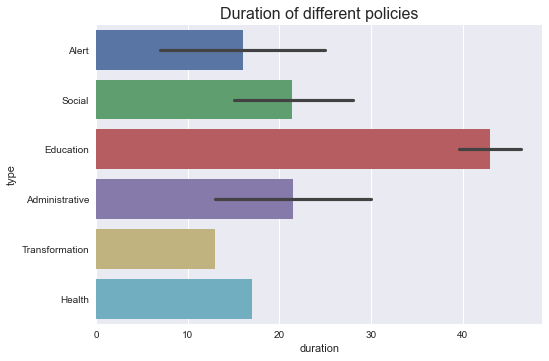

In [21]:
plt.title("Duration of different policies", fontsize=16)
sns.barplot( 'duration', 'type',data = policy);

The policies regarding education were the longest ones.

### **REGION**

Which provinces are the most affected?

In [22]:
region = pd.read_csv("Region.csv", encoding = 'latin-1')
region.drop(columns=['code', 'latitude', 'longitude', 'city'], inplace=True)
region.set_index('province', inplace=True)
region.head()

elementary_school_count  kindergarten_count  university_count  \
province                                                                  
Seoul                         607                 830                48   
Seoul                          33                  38                 0   
Seoul                          27                  32                 0   
Seoul                          14                  21                 0   
Seoul                          36                  56                 1   

          academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
province                                                                 
Seoul              1.44                     15.38                  5.8   
Seoul              4.18                     13.17                  4.3   
Seoul              1.54                     14.55                  5.4   
Seoul              0.67                     19.49                  8.5   
Seoul              1.17                     14.39                  5.7   

          nursing_home_count  
province                      
Seoul                  22739  
Seoul                   3088  
Seoul                   1023  
Seoul                    628  
Seoul                   1080

In [23]:
province_sum = region.groupby('province').sum()
province_sum.drop(province_sum.index[14], inplace=True)
province_sum.reset_index(inplace=True)

In [24]:
if region.isnull().any(axis=None):
    missingno.matrix(region)
    plt.show()

In [27]:
time_province = pd.read_csv("TimeProvince.csv", encoding = 'latin-1')
time_province.drop(columns=['time', 'date'], inplace=True)
provinces_group = time_province.groupby('province').sum()

merged = province_sum.merge(provinces_group, how='inner', on='province')
merged.set_index("province", inplace=True)
merged.sort_values(ascending=False, by="confirmed")

elementary_school_count  kindergarten_count  \
province                                                         
Daegu                                  458                 710   
Gyeongsangbuk-do                       942                1414   
Seoul                                 1214                1660   
Gyeonggi-do                           2554                4474   
Chungcheongnam-do                      818                 998   
Incheon                                500                 806   
Busan                                  608                 816   
Gyeongsangnam-do                      1002                1372   
Gangwon-do                             698                 736   
Chungcheongbuk-do                      518                 656   
Ulsan                                  238                 400   
Daejeon                                296                 520   
Sejong                                  48                  60   
Gwangju                                310                 624   
Jeollabuk-do                           838                1038   
Jeollanam-do                           858                1084   
Jeju-do                                113                 123   

                   university_count  academy_ratio  elderly_population_ratio  \
province                                                                       
Daegu                            22          15.42                    153.28   
Gyeongsangbuk-do                 66          22.77                    661.35   
Seoul                            96          35.36                    409.19   
Gyeonggi-do                     122          45.46                    461.75   
Chungcheongnam-do                42          17.96                    381.51   
Incheon                          14          11.60                    180.39   
Busan                            44          22.57                    329.08   
Gyeongsangnam-do                 42          25.90                    470.24   
Gangwon-do                       36          21.22                    434.92   
Chungcheongbuk-do                34          12.28                    278.31   
Ulsan                             8          12.67                     70.64   
Daejeon                          30           8.55                     86.26   
Sejong                            3           1.78                      9.48   
Gwangju                          34          14.84                     88.89   
Jeollabuk-do                     38          19.95                    412.06   
Jeollanam-do                     38          24.50                    647.27   
Jeju-do                           4           1.53                     15.10   

                   elderly_alone_ratio  nursing_home_count  confirmed  \
province                                                                
Daegu                             71.7               10166     807506   
Gyeongsangbuk-do                 363.2                8948     161079   
Seoul                            154.0               45478      81923   
Gyeonggi-do                      194.7               40982      81059   
Chungcheongnam-do                187.3                7282      16780   
Incheon                           79.6                8994      16645   
Busan                            154.6               13504      16341   
Gyeongsangnam-do                 279.7               10728      13860   
Gangwon-do                       220.0                5038       5908   
Chungcheongbuk-do                141.9                5538       5801   
Ulsan                             31.0                3602       5269   
Daejeon                           37.2                5968       5217   
Sejong                             3.8                 491       5111   
Gwangju                           40.3                5704       3359   
Jeollabuk-do                     233.0                7548       2108   
Je

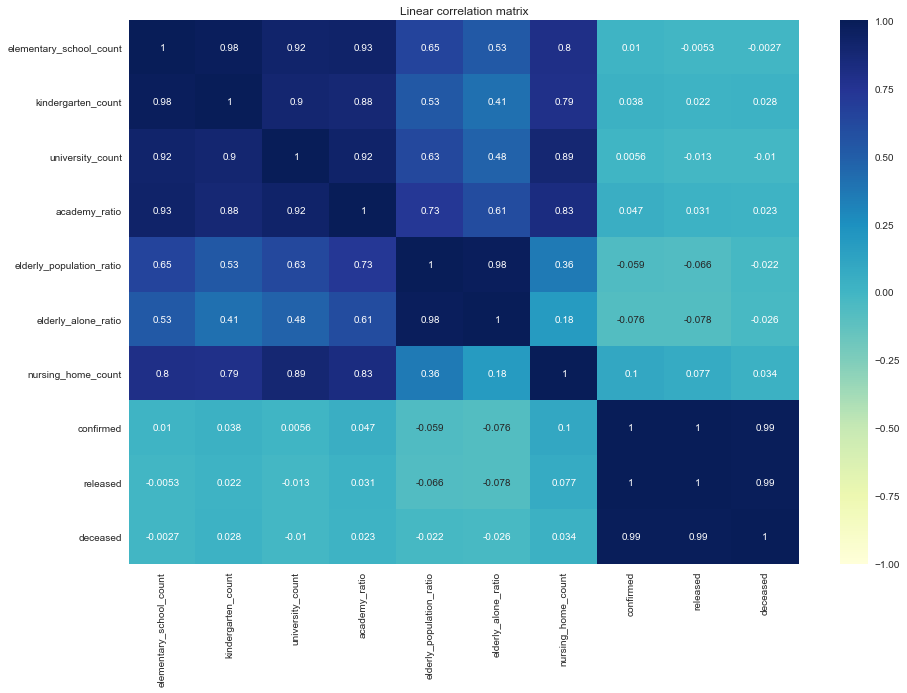

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(merged.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Linear correlation matrix')
plt.show()

The most affected provinces are Daegu, Gyeongsangbuk-do, Seoul. 	

### **TREND**

What are search trends involving respiratory diseases?

In [29]:
trend = pd.read_csv("SearchTrend.csv", encoding = 'latin-1')
trend.head()

date     cold      flu  pneumonia  coronavirus
0  2016-01-01  0.11663  0.05590    0.15726      0.00736
1  2016-01-02  0.13372  0.17135    0.20826      0.00890
2  2016-01-03  0.14917  0.22317    0.19326      0.00845
3  2016-01-04  0.17463  0.18626    0.29008      0.01145
4  2016-01-05  0.17226  0.15072    0.24562      0.01381

In [30]:
if trend.isnull().any(axis=None):
    missingno.matrix(trend)
    plt.show()

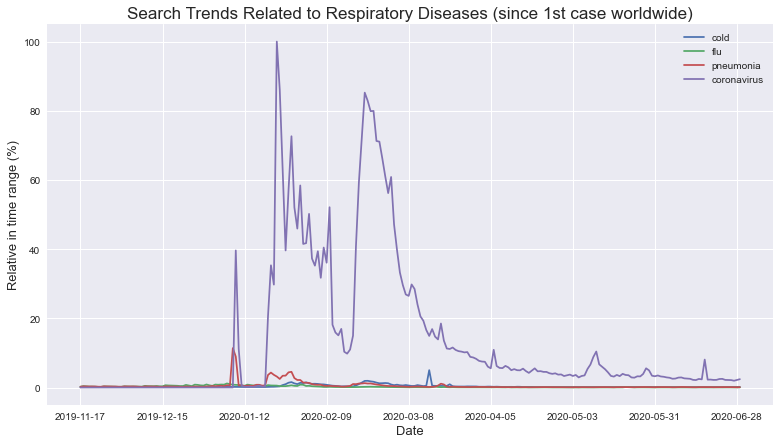

In [31]:
fig, ax = plt.subplots(figsize=(13, 7))

plt.title('Search Trends Related to Respiratory Diseases (since 1st case worldwide)', size=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Relative in time range (%)', size=13)

for col in trend.columns[1:]:
    sns.lineplot(trend.date[trend.date >= '2019-11-17']
             , trend[trend.date >= '2019-11-17'][col])
    
ax.set_xticks(ax.get_xticks()[::int(len(trend.date[trend.date >= '2019-11-17'])/8)])
ax.legend(trend.columns.drop("date"))
plt.show()

Searching coronavirus decreases rapidly after few months of peaking.

### **SEOUL**

In [32]:
seoul = pd.read_csv("SeoulFloating.csv", encoding = 'latin-1')
seoul.head()

date  hour  birth_year     sex province           city  fp_num
0  2020-01-01     0          20  female    Seoul      Dobong-gu   19140
1  2020-01-01     0          20    male    Seoul      Dobong-gu   19950
2  2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
3  2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
4  2020-01-01     0          20  female    Seoul     Dongjag-gu   28880

In [33]:
if seoul.isnull().any(axis=None):
    missingno.matrix(seoul)
    plt.show()

Floating population: A group of people who reside in a given population for a certain amount of time and for various reasons, but are not generally considered part of the official census count

What age group is most common for floating population?

In [34]:
birth_year = seoul.groupby('birth_year', as_index = False).sum()

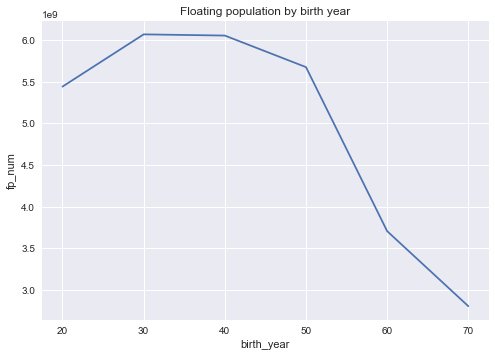

In [35]:
plt.title('Floating population by birth year')
sns.lineplot('birth_year', 'fp_num', data = birth_year);

The distribution of the population according to birth year shows that people aged 30-40 refers to the most common floating population group.

### TIME AND **AGE**

How related confirmed cases and death are by age group?

In [36]:
time_age = pd.read_csv("TimeAge.csv", encoding = 'latin-1')
time_age.head()

date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1

In [37]:
if time_age.isnull().any(axis=None):
    missingno.matrix(time_age)
    plt.show()

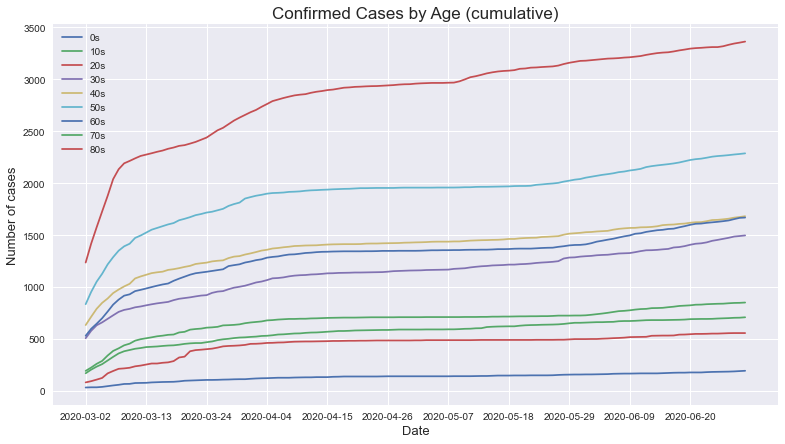

In [38]:
def plot_groupby(data, groupby, column, title, ylabel=None, axis=None):
    
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.title(f'{title}', fontsize=17)
    ax.set_xlabel('Date', size=13)
    ax.set_ylabel('Number of cases', size=13)

    
    group_list = data.groupby(groupby)
    for group in group_list:
        if axis == None:
            sns.lineplot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        else:
            sns.lineplot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
  
    dates_num = 12
    ax.set_xticks(ax.get_xticks()[::int(len(time_age.date.unique())/dates_num)+1])
    ax.legend()
    plt.show()
plot_groupby(time_age, 'age', 'confirmed', 'Confirmed Cases by Age (cumulative)')

People in their 20s occupies majority of all confirmed cases.

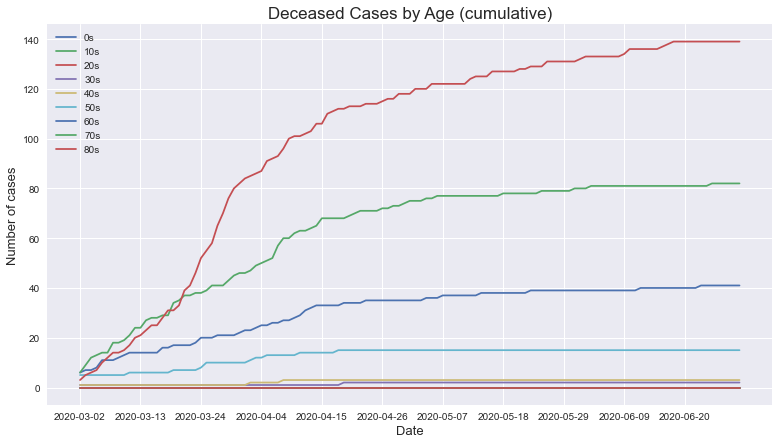

No handles with labels found to put in legend.


age  deceased
0   0s         0
1  10s         0
2  20s         0
3  30s         2
4  40s         3
5  50s        15
6  60s        41
7  70s        82
8  80s       139

In [39]:
plot_groupby(time_age, 'age', 'deceased', 'Deceased Cases by Age (cumulative)')

age_deceased = time_age.tail(9)[['age', 'deceased']]
age_deceased.set_index(np.arange(0, len(time_age.age.unique())), inplace=True)
ax.legend()
display(age_deceased)

Death is more common for people in their 80s.

### TIME AND **GENDER**

In [40]:
time_gender = pd.read_csv("TimeGender.csv", encoding = 'latin-1')
time_gender.drop(columns=['date', 'time'], inplace=True)
time_gender.head()

sex  confirmed  deceased
0    male       1591        13
1  female       2621         9
2    male       1810        16
3  female       3002        12
4    male       1996        20

Is there a gap between genders concerning confirmed cases?

In [41]:
if time_gender.isnull().any(axis=None):
    missingno.matrix(time_gender)
    plt.show()

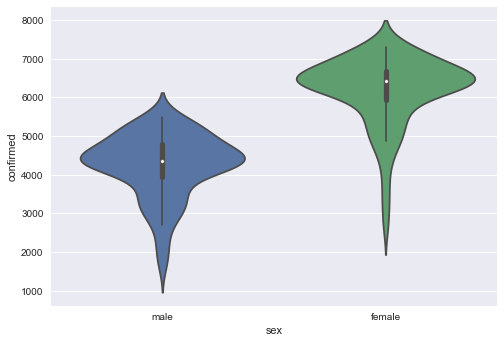

In [42]:
sns.violinplot('sex', 'confirmed', data = time_gender);

### TIME AND **PROVINCE**

In [43]:
time_province.head()

province  confirmed  released  deceased
0    Seoul          0         0         0
1    Busan          0         0         0
2    Daegu          0         0         0
3  Incheon          1         0         0
4  Gwangju          0         0         0

In [44]:
if time_province.isnull().any(axis=None):
    missingno.matrix(time_province)
    plt.show()

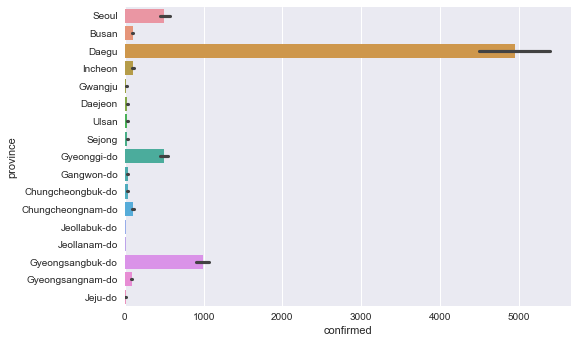

In [46]:
sns.barplot('confirmed','province', data = time_province);

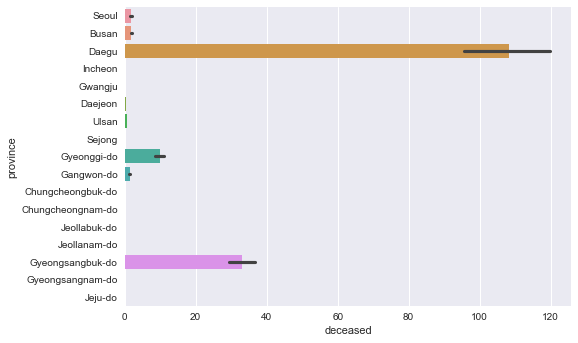

In [47]:
sns.barplot('deceased','province', data = time_province);

Daegu is the only province with disproportionally high deceased number of deaths. 
Seoul, though, has lower deaths than expected. The question for both is why?

### **WEATHER**

In [48]:
weather = pd.read_csv("Weather.csv", encoding = 'latin-1')
weather.set_index("province", inplace=True)
weather.drop(columns=['code', 'date'], inplace=True)
weather.head()

avg_temp  min_temp  max_temp  precipitation  max_wind_speed  \
province                                                                
Seoul          1.2      -3.3       4.0            0.0             3.5   
Busan          5.3       1.1      10.9            0.0             7.4   
Daegu          1.7      -4.0       8.0            0.0             3.7   
Gwangju        3.2      -1.5       8.1            0.0             2.7   
Incheon        3.1      -0.4       5.7            0.0             5.3   

          most_wind_direction  avg_relative_humidity  
province                                              
Seoul                    90.0                   73.0  
Busan                   340.0                   52.1  
Daegu                   270.0                   70.5  
Gwangju                 230.0                   73.1  
Incheon                 180.0                   83.9

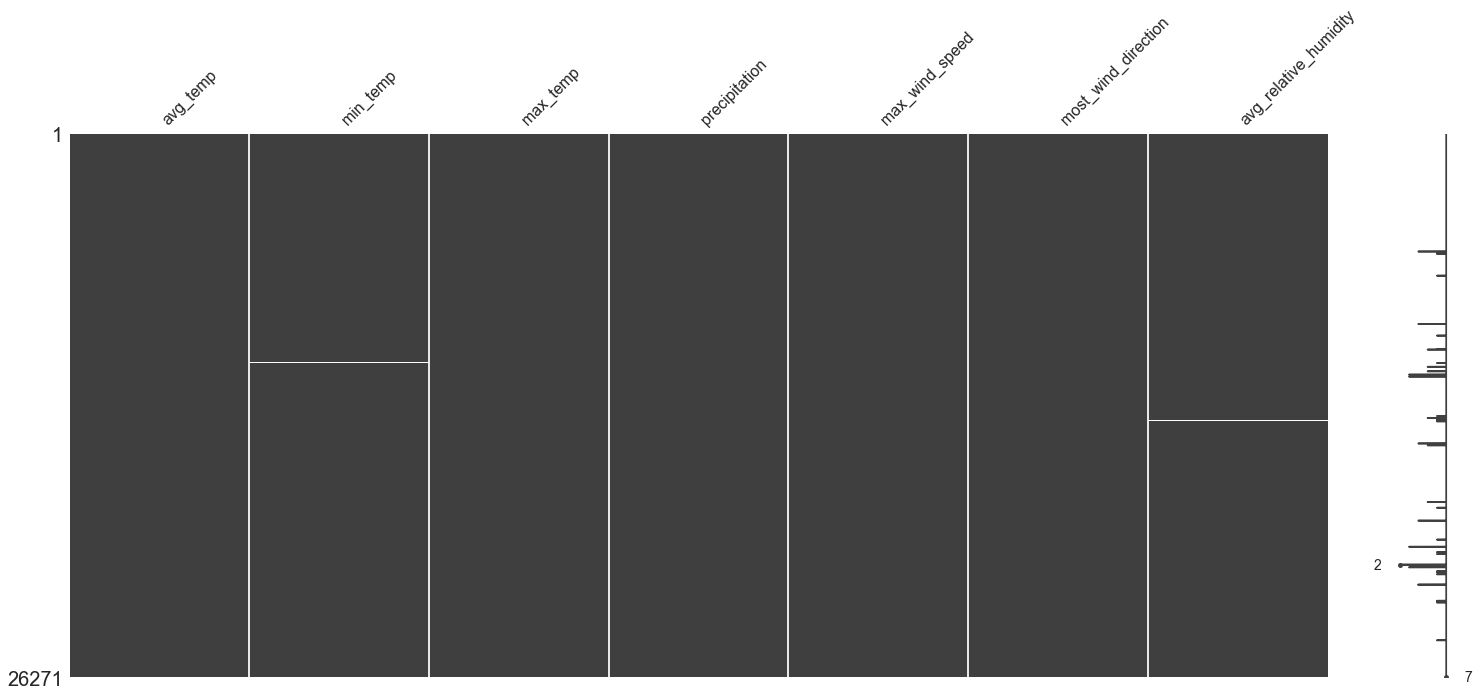

In [49]:
if weather.isnull().any(axis=None):
    missingno.matrix(weather)
    plt.show()

In [50]:
weather.dropna(inplace=True)

In [51]:
weather_status = weather.groupby('province').mean()
weather_status.sort_values(ascending=True, by="avg_relative_humidity")

avg_temp   min_temp   max_temp  precipitation  \
province                                                            
Gangwon-do         13.874085   9.933293  18.316341       1.445732   
Seoul              13.056471   8.852991  18.062271       1.417277   
Daegu              14.298355   9.424071  19.811639       1.260451   
Gyeongsangbuk-do   13.522318   8.800555  19.036005       1.293711   
Busan              15.169329  11.857378  19.397561       1.893780   
Gyeongsangnam-do   14.381790  10.269671  19.387942       1.866382   
Chungcheongbuk-do  11.901861   6.293859  18.188648       1.250993   
Jeollanam-do       14.847738  11.898594  18.447738       1.848716   
Ulsan              14.438672  10.224665  19.201340       1.562058   
Incheon            12.605972   9.364046  16.415905       1.206338   
Daejeon            13.543301   8.741961  19.047442       1.559135   
Gyeonggi-do        12.782704   7.979781  18.439403       1.484287   
Gwangju            14.487515  10.221376  19.828197       1.615469   
Chunghceongbuk-do  23.475862  18.300000  29.403448       2.886207   
Jeju-do            16.532480  13.822243  19.759963       1.489031   
Jeollabuk-do       13.792748   9.372334  19.119805       1.391042   
Chungcheongnam-do  12.273607   7.337967  17.751378       1.165279   

                   max_wind_speed  most_wind_direction  avg_relative_humidity  
province                                                                       
Gangwon-do               5.038232           234.817073              55.610549  
Seoul                    4.531074           210.238095              57.732540  
Daegu                    4.988483           208.860451              60.316941  
Gyeongsangbuk-do         6.147287           180.789149              62.472195  
Busan                    6.397378           186.219512              62.841707  
Gyeongsangnam-do         4.499513           135.767357              64.314129  
Chungcheongbuk-do        3.914330           149.205955              64.874380  
Jeollanam-do             7.948839           182.353301              65.313447  
Ulsan                    4.681669           257.082826              66.163459  
Incheon                  5.765021           211.109080              67.609567  
Daejeon                  3.894945           238.380024              68.412911  
Gyeonggi-do              4.493605           221.833130              68.868270  
Gwangju                  4.133557           136.753959              69.621011  
Chunghceongbuk-do        4.031034           155.172414              69.724138  
Jeju-do                  6.209385           182.827544              69.781170  
Jeollabuk-do             4.309445           205.594150              71.752285  
Chungcheongnam-do        4.802511           192.627067              75.347030

Dry air makes the mucous membranes in our noses dry and more permeable to viruses. Drop in humidity makes it easier for airborne viral particles to travel. Seoul, Daegu, Gangwon-do and Gyeongsangbuk-do, which are part of provinces with lowest humidity levels are also the ones with most confirmed cases.

# Statistical significance test

Test of independence between sex and confirmed cases.
Chi-square test is the most suitable tool to check if association between variables is significant, because of categorical variables. 


In [52]:
cross = pd.crosstab(patient["sex"],patient["state"])
observed = np.array(cross.values)
stat, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.05
p_value = stats.chi2.cdf(x=stat, df=dof)

if (p_value <= alpha):
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
p_value

Independent (fail to reject H0)


0.9883493429396242

The p_value is approx
0.9 which is way more than 0.05, there is no statistical significance between sex and confirmed cases.

# PCA

In [54]:
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(region), 
                         columns=region.columns)
ff.create_distplot([df_scaled[c] for c in df_scaled.columns], 
                    df_scaled.columns, 
                    show_hist=False)

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

pca = PCA()
pca.fit(df_scaled)
exp_variance = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Cumulative explained variance')

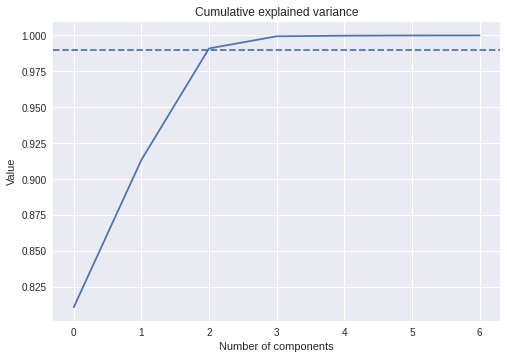

In [ ]:
cum_exp_variance = np.cumsum(exp_variance)
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.99, linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Value')
plt.title('Cumulative explained variance')

In [ ]:
pca = PCA(2)
pca.fit(df_scaled)
pca_projection = pca.transform(df_scaled)

In [ ]:
PCA_components = pd.DataFrame(pca_projection)

In [ ]:
import plotly.express as px
fig = px.scatter(PCA_components, x=0, y=1, color=region.index)
fig.show()

# T-SNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)
results = pd.DataFrame(tsne_results)

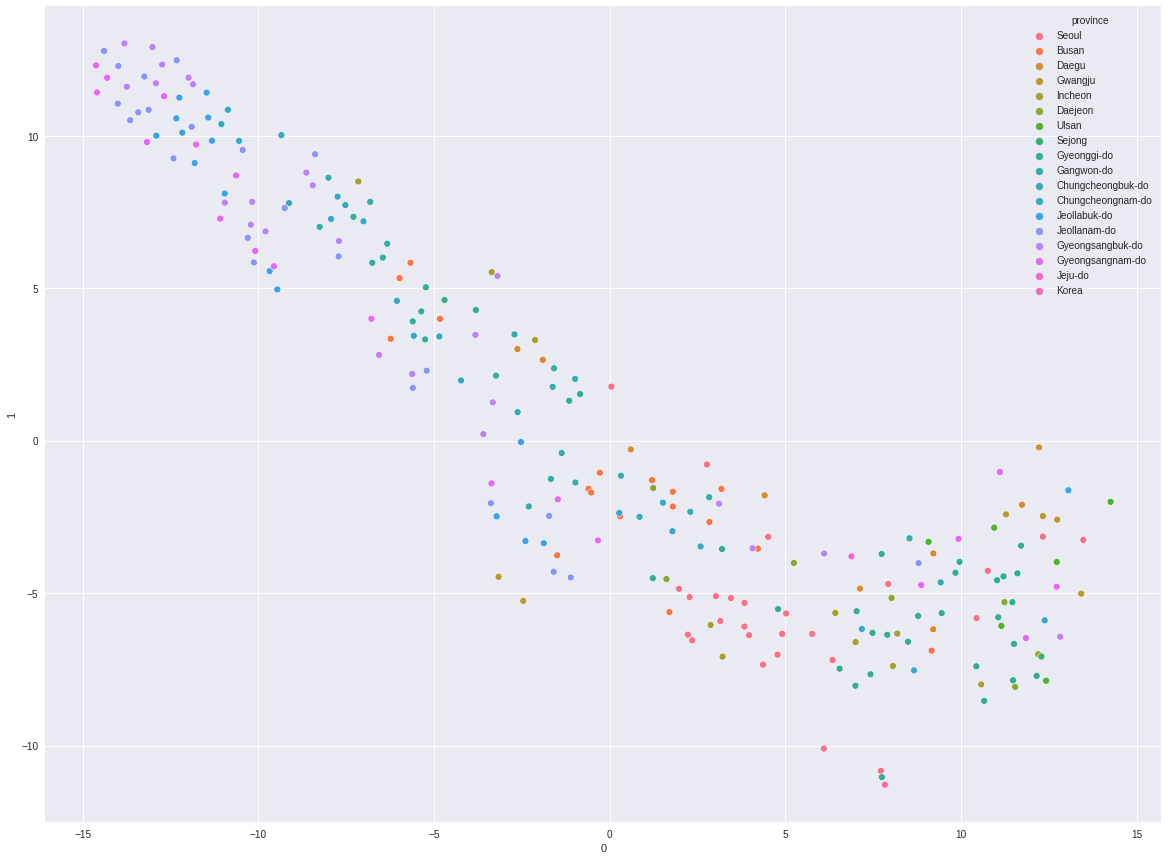

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

sns.scatterplot(data=results, x=0, y=1, hue =region.index)

def label_point(x, y, val, ax):
    for _x, _y, _val in zip(x, y, val):
        ax.text(_x, _y, str(_val))

# Clusters

Clustering of cases

In [ ]:
cases = case.drop(columns=["latitude", "longitude", "group"])

In [ ]:
le = LabelEncoder()

for col in cases.columns.values:
  if cases[col].dtypes == 'object':
    le.fit(cases[col].values)
    cases[col] = le.transform(cases[col])

cases.head()

case_id  province  city  infection_case  confirmed
0   1000001        15    46              34        139
1   1000002        15    22              50        119
2   1000003        15    21              26         95
3   1000004        15    42              71         43
4   1000005        15    10              10         43

In [ ]:
scaled = pd.DataFrame(MinMaxScaler().fit_transform(cases), 
                         columns=cases.columns)
ff.create_distplot([scaled[c] for c in scaled.columns], 
                    scaled.columns, 
                    show_hist=False)

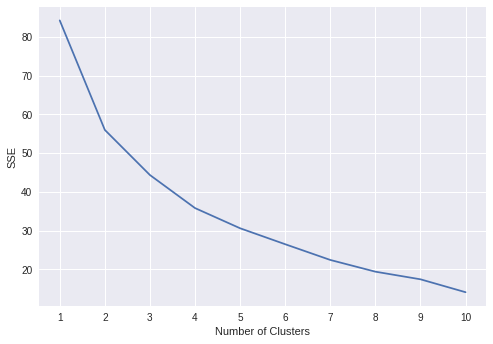

In [ ]:
from sklearn.cluster import KMeans

kmeans_kwargs = {  
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

sse = [] 
for k in range(1, 11): 
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)  
  kmeans.fit(scaled)  
  sse.append(kmeans.inertia_)  

fig, axs = plt.subplots()
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

fig.set(facecolor='white')
plt.show()

In [ ]:
! pip install kneed

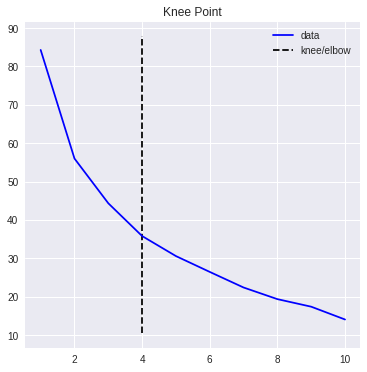

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.plot_knee()

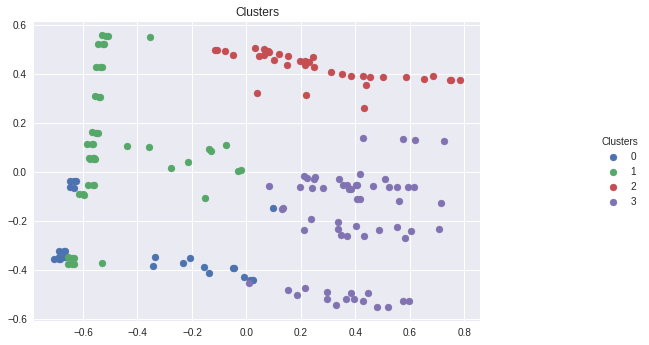

In [ ]:
from sklearn.cluster import KMeans
pca = PCA()
df = pca.fit_transform(scaled)
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15,
                max_iter = 500).fit(scaled)
label = kmeans.fit_predict(scaled)
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1,title="Clusters")
plt.title('Clusters')
plt.show()

# Linear model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif

Humidity prediction

In [ ]:
weather.head()

avg_temp  min_temp  ...  most_wind_direction  avg_relative_humidity
province                      ...                                            
Seoul          1.2      -3.3  ...                 90.0                   73.0
Busan          5.3       1.1  ...                340.0                   52.1
Daegu          1.7      -4.0  ...                270.0                   70.5
Gwangju        3.2      -1.5  ...                230.0                   73.1
Incheon        3.1      -0.4  ...                180.0                   83.9

[5 rows x 7 columns]

In [ ]:
le = LabelEncoder()

for col in weather.columns.values:
  if weather[col].dtypes == 'object':
    le.fit(weather[col].values)
    weather[col] = le.transform(weather[col])

weather.dropna(inplace=True)

In [ ]:
X = weather.drop(['avg_relative_humidity'], axis=1)
y = weather.avg_relative_humidity

selector = SelectKBest(score_func=f_classif, k=2)
fitted = selector.fit(X, y)
features_scores = pd.DataFrame(fitted.scores_)
features_columns = pd.DataFrame(X.columns)

best_features = pd.concat([features_columns, features_scores], axis=1)
best_features.columns = ['Feature', 'Score']
best_features.sort_values(by='Score', ascending=False, inplace=True)
best_features

Feature      Score
1             min_temp  14.191817
0             avg_temp  10.602432
2             max_temp   7.835991
3        precipitation   6.071939
4       max_wind_speed   2.949514
5  most_wind_direction   2.832988

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
prediction_diff = y_pred - y_test
check_predictions = {'Predictions': y_pred, 'Actuals': y_test, 'Difference': prediction_diff}
check_predictions_df = pd.DataFrame(check_predictions)
check_predictions_df

Predictions  Actuals  Difference
province                                          
Busan               80.344551     60.4   19.944551
Daejeon             73.359713     85.1  -11.740287
Ulsan               69.138097     66.5    2.638097
Incheon             64.265747     58.4    5.865747
Seoul               60.703301     52.0    8.703301
...                       ...      ...         ...
Jeollanam-do        60.992017     48.3   12.692017
Daejeon             73.126544     83.6  -10.473456
Jeju-do             80.508155     86.3   -5.791845
Gyeongsangnam-do    75.480491     81.6   -6.119509
Ulsan               55.256673     29.0   26.256673

[8654 rows x 3 columns]

In [ ]:
print(f"Accuracy score: {regressor.score(X_test, y_test)}")

Accuracy score: 0.39852232532149334


# Summary

 

*  In the provinces the majority of infection happened among groups. Mostly people get infected in church, hospitals, clubs or some kind of centers.
* The state of the patient does not depend on gender.
* Time spent in hospital increases with age. On avarage it is 24 days.Those who were isolated were released from the hospital sooner. Those who died stayed in the hospital the longest.
* The policies regarding education were the longest ones.
* Searching coronavirus decreases rapidly after few months of peaking.
* The distribution of the population according to birth year shows that people aged 30-40 refers to the most common floating population group.
* People in their 20s occupies majority of all confirmed cases. But death is more common for people in their 80s. Countries need to separate the two groups while preventing spreads as a whole.
* The most affected provinces are Daegu, Gyeongsangbuk-do, Seoul. 
Daegu is the only province with disproportionally high deceased number of deaths. Seoul, though, has lower deaths than expected. The question for both is why?
* Drop in humidity makes it easier for airborne viral particles to travel. Seoul, Daegu, Gangwon-do and Gyeongsangbuk-do, which are part of provinces with lowest humidity levels are also the ones with most confirmed cases.












